In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

from IPython.display import Audio

In [2]:
SR = 22050
DURATION = 4.

In [3]:
def gen_harmonic(n, sr=SR, duration=DURATION, f0=440):
    signal = np.sin(2*np.pi*np.arange(sr*duration)*(n+1)*f0/sr)
    return signal

In [4]:
def draw_spectrogram(signal, title, sr=SR, low_lim=0, high_lim=SR//2):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear', fmax=sr//2, x_axis='time')
    plt.title(title)
    plt.ylim([low_lim, high_lim])
    plt.colorbar()

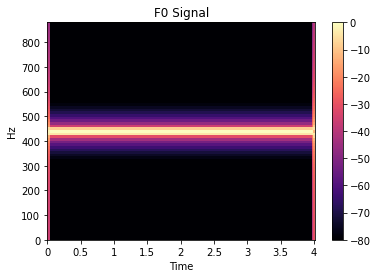

In [7]:
f0_signal = gen_harmonic(0)
draw_spectrogram(f0_signal, 'F0 Signal', high_lim=880)
Audio(f0_signal, rate=SR)

In [26]:
def amplitude(n, rate):
    A = np.exp(-n*rate)
    return A
    

def gen_complex(f0, n=10, decay=None):
    if decay is None:
        A = lambda x: 1
    else:
        A = lambda x: amplitude(x, rate=decay)
    
    signal = gen_harmonic(n=0, f0=f0)
    for i in range(1, n):
        signal += A(i) * gen_harmonic(n=i, f0=f0)
    return signal

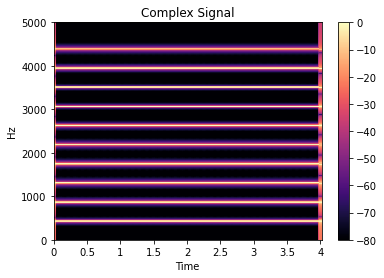

In [25]:
complex440 = gen_complex(440)
draw_spectrogram(complex440, 'Complex Signal', high_lim=5000)
Audio(complex440, rate=SR)

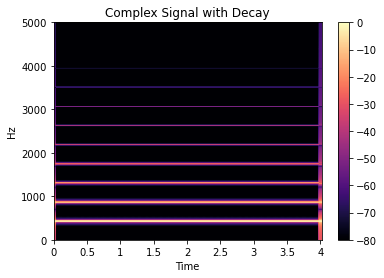

In [27]:
complex440decay = gen_complex(440, decay=1)
draw_spectrogram(complex440decay, 'Complex Signal with Decay', high_lim=5000)
Audio(complex440decay, rate=SR)

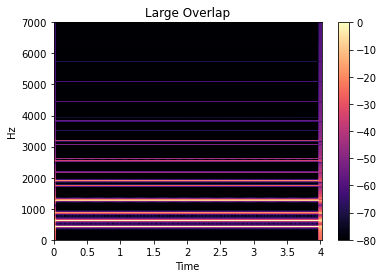

In [31]:
large_overlap = gen_complex(440, decay=1) + gen_complex(640, decay=1)
draw_spectrogram(large_overlap, 'Large Overlap', high_lim=7000)
Audio(large_overlap, rate=SR)

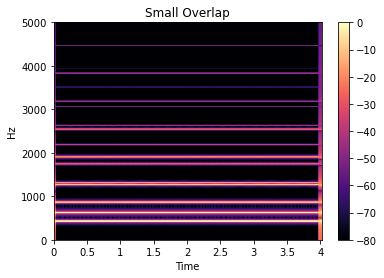

In [33]:
small_overlap = gen_complex(440, decay=1) + gen_complex(442, decay=1)
draw_spectrogram(large_overlap, 'Small Overlap', high_lim=5000)
Audio(large_overlap, rate=SR)

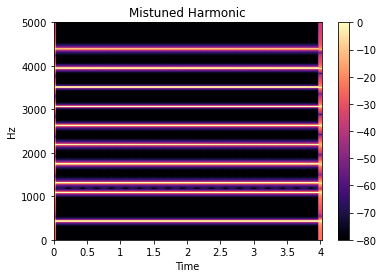

In [43]:
mistune = gen_complex(440, n=10) - gen_harmonic(1) + gen_harmonic(0, f0=440*2.5)
draw_spectrogram(mistune, 'Mistuned Harmonic', high_lim=5000)
Audio(mistune, rate=SR)